# Import & Preview Dataset

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Display the first 5 rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Clean Dataset for SMS Spam Classification

In [5]:
# Drop unnecessary columns
df = df[['v1', 'v2']]

# Rename columns
df.columns = ['label', 'message']

# Preview cleaned dataset
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

Dataset shape: (5572, 2)


In [7]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 label      0
message    0
dtype: int64


In [9]:
# Data types
print("\nData types:\n", df.dtypes)


Data types:
 label      object
message    object
dtype: object


In [10]:
# Class distribution (ham vs spam)
print("\nClass distribution:\n", df['label'].value_counts())


Class distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


In [11]:
# Percentage distribution
print("\nPercentage distribution:\n", df['label'].value_counts(normalize=True) * 100)


Percentage distribution:
 label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


# EDA Summary



```
Total Rows - 5,572
Columns	2 - label, message
Missing Values -None
Data Types - Both columns are object
Class Distribution -	86.6% ham, 13.4% spam → imbalanced
```





 # Data Cleaning

In [13]:
# 1. Clean label text (lowercase + strip whitespace)
df['label'] = df['label'].str.lower().str.strip()

# 2. Check for duplicate rows
print("Total Duplicates:", df.duplicated().sum())

# 3. Drop duplicate rows
df = df.drop_duplicates()

# 4. Final dataset shape after cleaning
print("New shape after cleaning:", df.shape)

Total Duplicates: 403
New shape after cleaning: (5169, 2)


# Feature Engineering





```
We'll extract the following from each SMS message:

char_count: Total number of characters

word_count: Total number of words

avg_word_length: Average word length

num_digits: Number of digits (e.g., phone numbers, dates)

num_special_chars: Count of special symbols like !, $, etc.

```





In [14]:
import numpy as np
import re

# Character count
df['char_count'] = df['message'].apply(len)

# Word count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

# Average word length
df['avg_word_length'] = df['char_count'] / df['word_count']

# Number of digits
df['num_digits'] = df['message'].apply(lambda x: sum(c.isdigit() for c in x))

# Number of special characters
df['num_special_chars'] = df['message'].apply(lambda x: len(re.findall(r'[^a-zA-Z0-9\s]', x)))

# Preview with new features
df.head()


,label,message,char_count,word_count,avg_word_length,num_digits,num_special_chars
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,5.550000,0,9
1,ham,Ok lar... Joking wif u oni...,29,6,4.833333,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,5.535714,25,6
3,ham,U dun say so early hor... U c already then say...,49,11,4.454545,0,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,4.692308,0,2


# EDA – Visual Insight Extraction

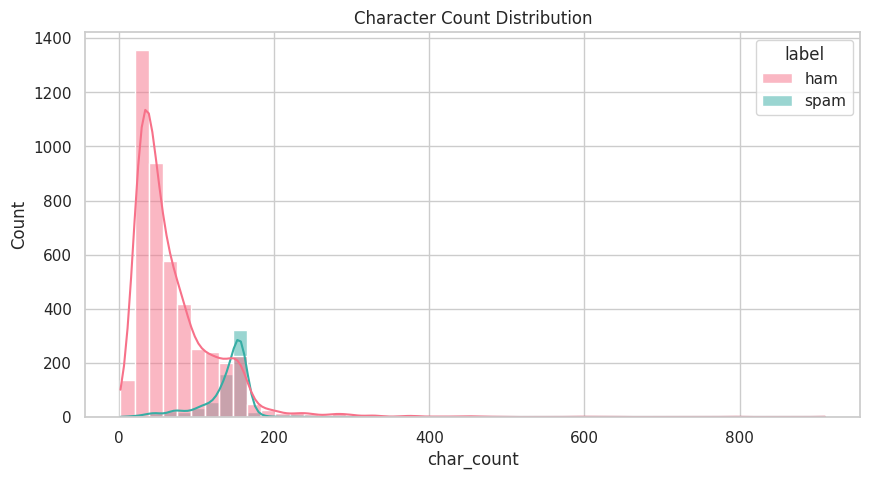

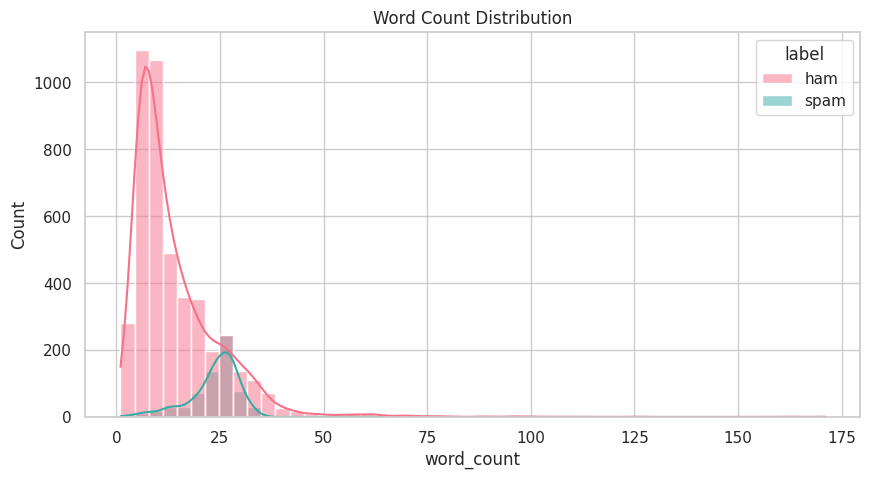

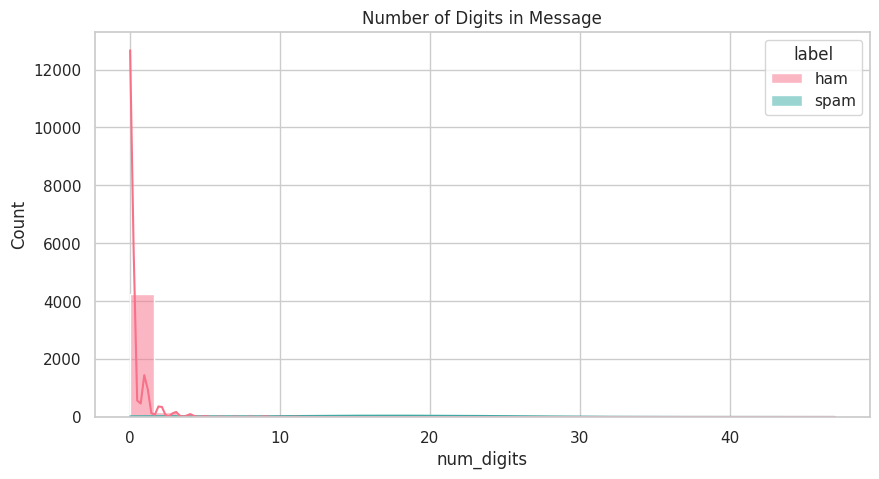

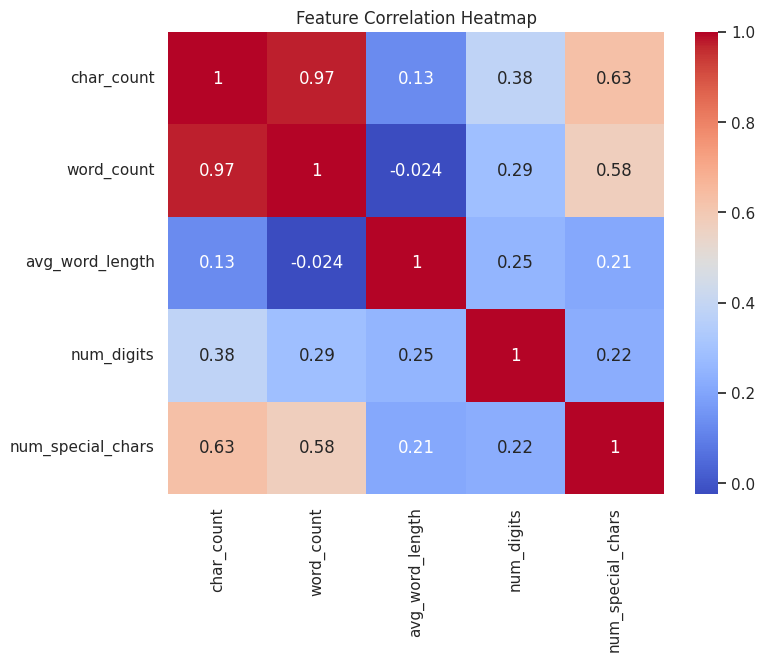

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Histogram: Character Count
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='char_count', hue='label', bins=50, kde=True, palette='husl')
plt.title("Character Count Distribution")
plt.show()

# 2. Histogram: Word Count
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='word_count', hue='label', bins=50, kde=True, palette='husl')
plt.title("Word Count Distribution")
plt.show()

# 3. Histogram: Number of Digits
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='num_digits', hue='label', bins=30, kde=True, palette='husl')
plt.title("Number of Digits in Message")
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['char_count', 'word_count', 'avg_word_length', 'num_digits', 'num_special_chars']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Key Insights:
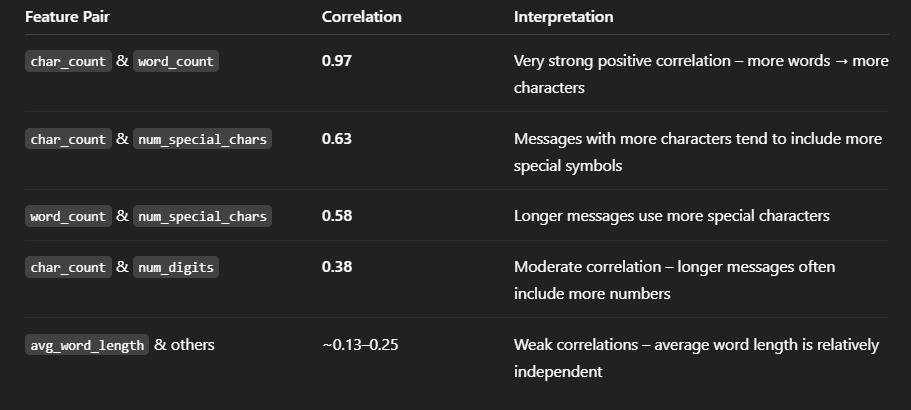

# Target Variable Identification & Transformation

label column contains: "ham" and "spam" (text)

We need to convert this to numbers:
- ham → 0
- spam → 1

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder
le = LabelEncoder()

# Fit and transform the 'label' column
df['label_encoded'] = le.fit_transform(df['label'])

# Check result
print(df[['label', 'label_encoded']].head())
print("\nClass mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

  label  label_encoded
0   ham              0
1   ham              0
2  spam              1
3   ham              0
4   ham              0

Class mapping: {'ham': np.int64(0), 'spam': np.int64(1)}


# Categorical Encoding & Numeric Scaling



```
Features like:

char_count

word_count

avg_word_length

num_digits

num_special_chars

We’ll use StandardScaler to bring all of them to the same scale.
```



In [17]:
from sklearn.preprocessing import StandardScaler

# Select features to scale
features_to_scale = ['char_count', 'word_count', 'avg_word_length', 'num_digits', 'num_special_chars']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Preview scaled values
df_scaled[features_to_scale + ['label_encoded']].head()


,char_count,word_count,avg_word_length,num_digits,num_special_chars,label_encoded
0,0.549917,0.420994,0.338243,-0.366007,1.028626,0
1,-0.858275,-0.843981,-0.295837,-0.366007,0.372048,0
2,1.305533,1.143836,0.325603,3.783606,0.372048,1
3,-0.514814,-0.392204,-0.630974,-0.366007,0.372048,0
4,-0.308737,-0.211493,-0.420611,-0.366007,-0.503389,0


# Train-Test Split & Sampling

In [18]:
from sklearn.model_selection import train_test_split

# Features and label
X = df_scaled[['char_count', 'word_count', 'avg_word_length', 'num_digits', 'num_special_chars']]
y = df_scaled['label_encoded']

# Stratified split (preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Print shape info
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)
print("Class distribution in train set:\n", y_train.value_counts(normalize=True))
print("Class distribution in test set:\n", y_test.value_counts(normalize=True))


Training set: (4135, 5)
Test set: (1034, 5)
Class distribution in train set:
 label_encoded
0    0.873761
1    0.126239
Name: proportion, dtype: float64
Class distribution in test set:
 label_encoded
0    0.873308
1    0.126692
Name: proportion, dtype: float64


# Baseline Model Building

## Logistic Regression



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict on test data
log_preds = log_model.predict(X_test)

# Evaluate
print("🔎 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))

🔎 Logistic Regression Results
Accuracy: 0.97678916827853
Confusion Matrix:
 [[898   5]
 [ 19 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       903
           1       0.96      0.85      0.90       131

    accuracy                           0.98      1034
   macro avg       0.97      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



Confusion Matrix:

|                 | Predicted Ham         | Predicted Spam       |
| --------------- | --------------------- | -------------------- |
| **Actual Ham**  | 898 (✅ correct)       | 5 (❌ false positive) |
| **Actual Spam** | 19 (❌ false negative) | 112 (✅ correct)      |

Classification Report:

- Precision (Spam) = 96%
→ Out of all messages predicted as spam, 96% were actually spam. (Good!)

- Recall (Spam) = 85%
→ Out of all actual spam messages, 85% were correctly detected.
⚠️ This shows some spam still slips through (15% are missed).

- F1 Score = 90%
→ A good balance between precision & recall for spam.




 ## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on test set
tree_preds = tree_model.predict(X_test)

# Evaluate
print("🔎 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, tree_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_preds))
print("Classification Report:\n", classification_report(y_test, tree_preds))

🔎 Decision Tree Results
Accuracy: 0.965183752417795
Confusion Matrix:
 [[881  22]
 [ 14 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       903
           1       0.84      0.89      0.87       131

    accuracy                           0.97      1034
   macro avg       0.91      0.93      0.92      1034
weighted avg       0.97      0.97      0.97      1034



Confusion Matrix:

|                 | Predicted Ham          | Predicted Spam         |
| --------------- | ---------------------- | ---------------------- |
| **Actual Ham**  | 881 ✅                  | 22 ❌ (false positives) |
| **Actual Spam** | 14 ❌ (false negatives) | 117 ✅                  |

Classification Report:

- Spam Recall improved to 89% (vs 85% in Logistic Regression) → fewer spam missed
- But more false positives (ham wrongly predicted as spam)
- So it’s a trade-off: better spam detection, but more aggressive.

## Random Forest


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_preds = rf_model.predict(X_test)

# Evaluate
print("🔎 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

🔎 Random Forest Results
Accuracy: 0.9816247582205029
Confusion Matrix:
 [[895   8]
 [ 11 120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.94      0.92      0.93       131

    accuracy                           0.98      1034
   macro avg       0.96      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



Confusion Matrix:

|                 | Predicted Ham          | Predicted Spam        |
| --------------- | ---------------------- | --------------------- |
| **Actual Ham**  | 895 ✅                  | 8 ❌ (false positives) |
| **Actual Spam** | 11 ❌ (false negatives) | 120 ✅                 |

Classification Report:

- Excellent balance between catching spam and avoiding false alarms.
- Highest spam precision & recall combo so far → makes it the most reliable model overall.

# Model Comparison & Selection

In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# To store results
results = []

# Train, predict, and collect metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, output_dict=True)

    spam_metrics = report['1']  # Metrics for class "1" (spam)

    results.append({
        'Model': model_name,
        'Accuracy': round(acc, 4),
        'Spam Precision': round(spam_metrics['precision'], 2),
        'Spam Recall': round(spam_metrics['recall'], 2),
        'Spam F1-Score': round(spam_metrics['f1-score'], 2)
    })

# Create DataFrame
comparison_df = pd.DataFrame(results)
print(comparison_df)


                 Model  Accuracy  Spam Precision  Spam Recall  Spam F1-Score
0  Logistic Regression    0.9768            0.96         0.85           0.90
1        Decision Tree    0.9652            0.84         0.89           0.87
2        Random Forest    0.9816            0.94         0.92           0.93


### 🔍 Key Metrics:

* **Accuracy**: How often the model is correct overall.
* **Precision (Spam)**: Out of all messages predicted as spam, how many were truly spam.
* **Recall (Spam)**: Out of all actual spam messages, how many were caught by the model.
* **F1-Score (Spam)**: Balance between precision and recall for spam detection.

---

### 📊 Model-by-Model Summary:

#### 🔹 Logistic Regression:

* **Strengths**: High overall accuracy and spam precision (96%).
* **Weakness**: Missed **15% of actual spam** (Recall = 85%), so it lets some spam through.
* ✅ Good for speed and interpretability, but not the best at catching spam.

#### 🔹 Decision Tree:

* **Strengths**: Better recall than logistic regression (89%).
* **Weakness**: More **false positives** — wrongly marks ham as spam.
* ⚠️ Tends to overfit on training data.

#### 🌟 **Random Forest** (Best Overall):

* **Highest Accuracy**: 98.16%
* **High Precision (94%) and Recall (92%)** → Best at catching spam while avoiding false alarms.
* **F1-score = 93%** → Strong balance between spam detection and accuracy.
* ✅ Most reliable, robust, and production-ready model.

---

### 🏆 Final Recommendation:

> Use **Random Forest** as the final model.
> It gives the **best balance** of detecting spam accurately while minimizing errors.
